# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv') ## Fill the blank to read the data

In [5]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


It appears that we have multiple different types of cuisine in this data, with different price ranges shown in cost of order. It does appear that not every rating is given, which will be key to note

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
df.shape

(1898, 9)

1898 rows and 9 columns are present in this data

### **Question 2:** What are the datatypes of the different columns in the dataset? [0.5 mark]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


order_id, customer_id, food_preparation_time, and delivery_time are integers. cost_of_the_order is also numeric as it is a float. restaurant_name, cuisine_type, day_of_the_week, and rating are text. Rating will likely need to be changed to numeric (along with potentially day of week, which could be numbered for weekday and weekend)

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [8]:
# Checking for missing values in the data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

no missing values in data

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# Get the summary statistics of the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


food_preparation_time

*   min: 20 min
*   avg: 27 min
*   max: 35 min




In [10]:
df.describe().T.style.set_properties(**{'width': '5px'})


,count,mean,std,min,25%,50%,75%,max
order_id,1898.000000,1477495.500000,548.049724,1476547.000000,1477021.250000,1477495.500000,1477969.750000,1478444.000000
customer_id,1898.000000,171168.478398,113698.139743,1311.000000,77787.750000,128600.000000,270525.000000,405334.000000
cost_of_the_order,1898.000000,16.498851,7.483812,4.470000,12.080000,14.140000,22.297500,35.410000
food_preparation_time,1898.000000,27.371970,4.632481,20.000000,23.000000,27.000000,31.000000,35.000000
delivery_time,1898.000000,24.161749,4.972637,15.000000,20.000000,25.000000,28.000000,33.000000


In [11]:

df.describe().T.style.set_properties(**{'width': '100px'}).format('{:.2f}'.format)


,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


### **Question 5:** How many orders are not rated? [1 mark]

In [12]:
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

736 orders were not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [13]:
df['order_id'].nunique()

1898

#### Customer ID

In [14]:
df['customer_id'].nunique()

1200

#### Restaurant name

In [15]:
df['restaurant_name'].nunique()

178

#### Cuisine type

In [16]:
df['cuisine_type'].nunique()

14

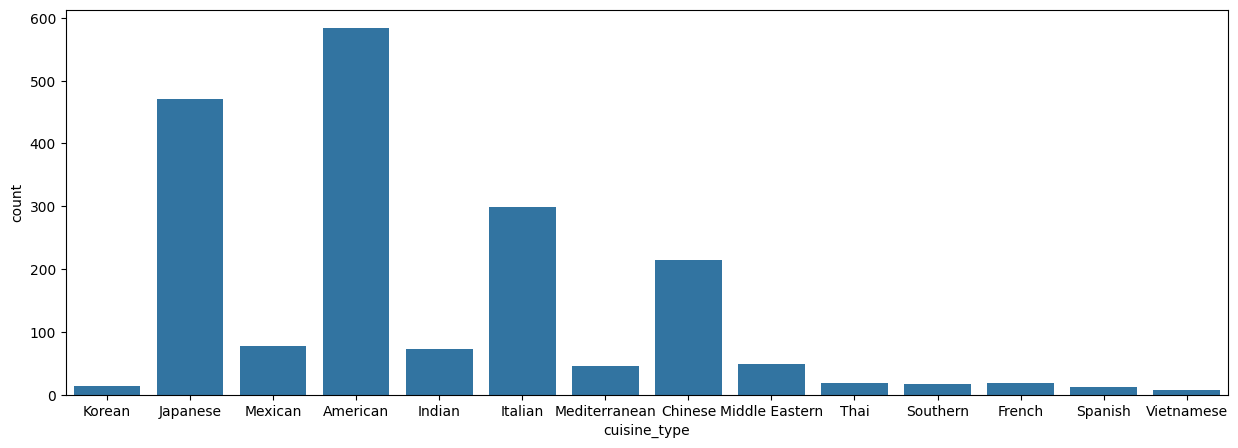

In [17]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')
plt.savefig("output.jpg", bbox_inches='tight')

#### Cost of the order

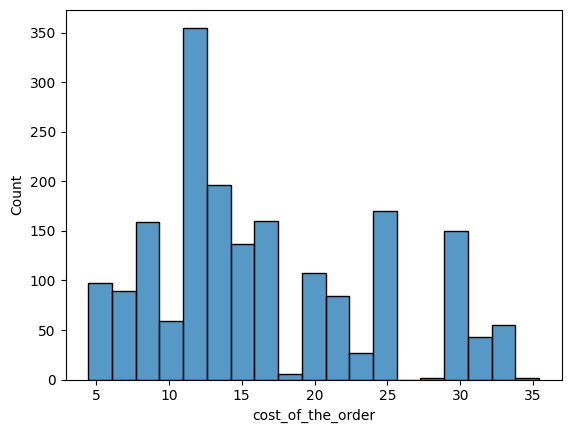

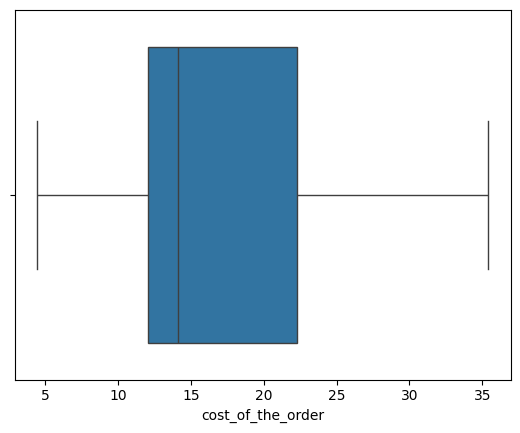

In [18]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

#### Day of the week

In [19]:
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

<Axes: xlabel='day_of_the_week', ylabel='count'>

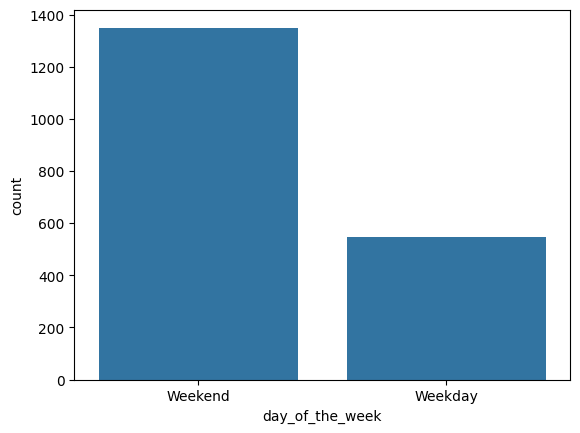

In [20]:
sns.countplot(data = df, x = 'day_of_the_week')

#### Rating

In [21]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

<Axes: xlabel='rating', ylabel='count'>

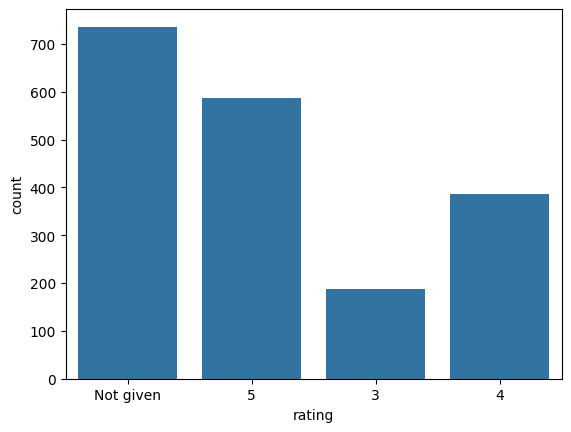

In [22]:
sns.countplot(data = df, x = 'rating')

In [23]:
df['food_preparation_time'].value_counts()


food_preparation_time
21    135
23    123
27    123
22    123
28    121
24    121
20    119
30    119
33    118
35    117
31    116
26    115
25    113
34    113
32    113
29    109
Name: count, dtype: int64

#### Food Preparation time

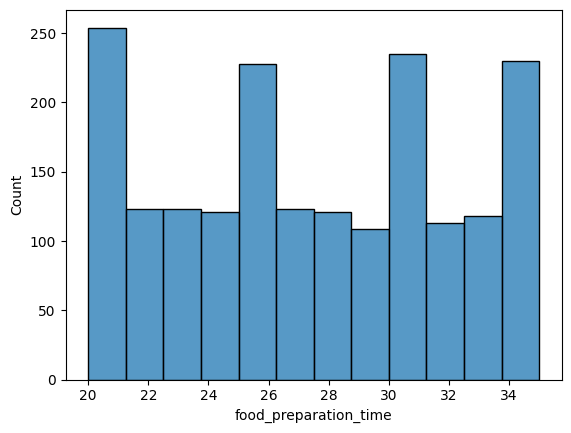

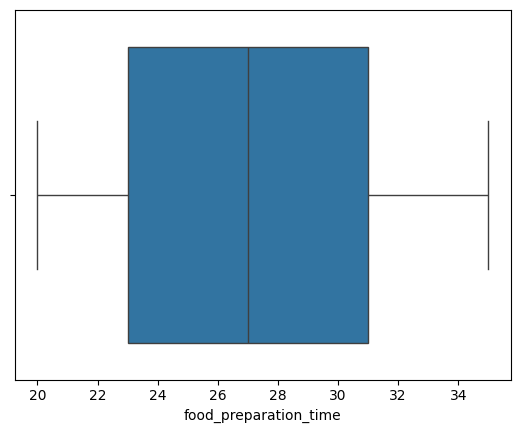

In [24]:
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

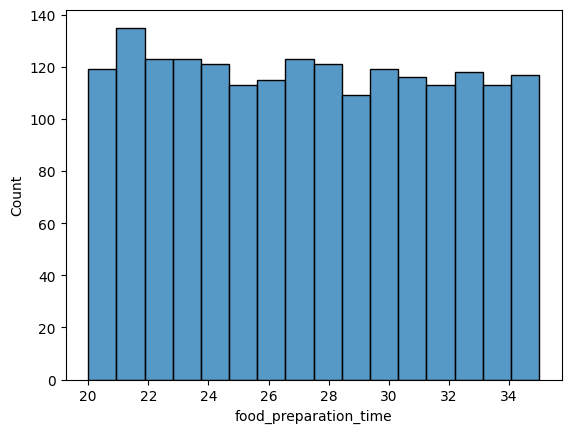

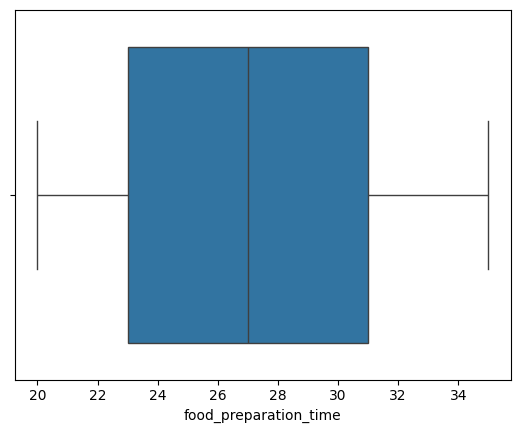

In [25]:
sns.histplot(data=df,x='food_preparation_time',bins=16)
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()


In [26]:
# prompt: number of unique values in delivery time

df['delivery_time'].nunique()


19

#### Delivery time

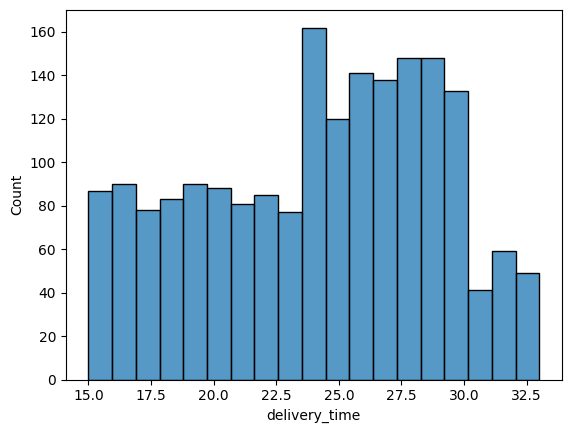

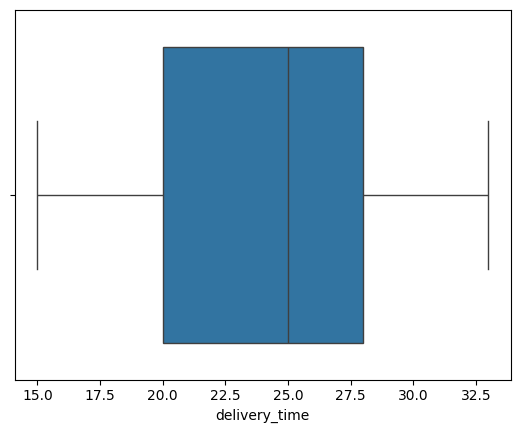

In [27]:
sns.histplot(data=df,x='delivery_time',bins=19)
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [28]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

### **Question 8:** Which is the most popular cuisine on weekends? [1 mark]

In [29]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

### **Question 9:** What percentage of the orders cost more than 20 dollars? [2 marks]


In [30]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20]

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


### **Question 10:** What is the mean order delivery time? [1 mark]

In [31]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [32]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head(5)

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
Name: count, dtype: int64

### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

#### Cuisine vs Cost of the order

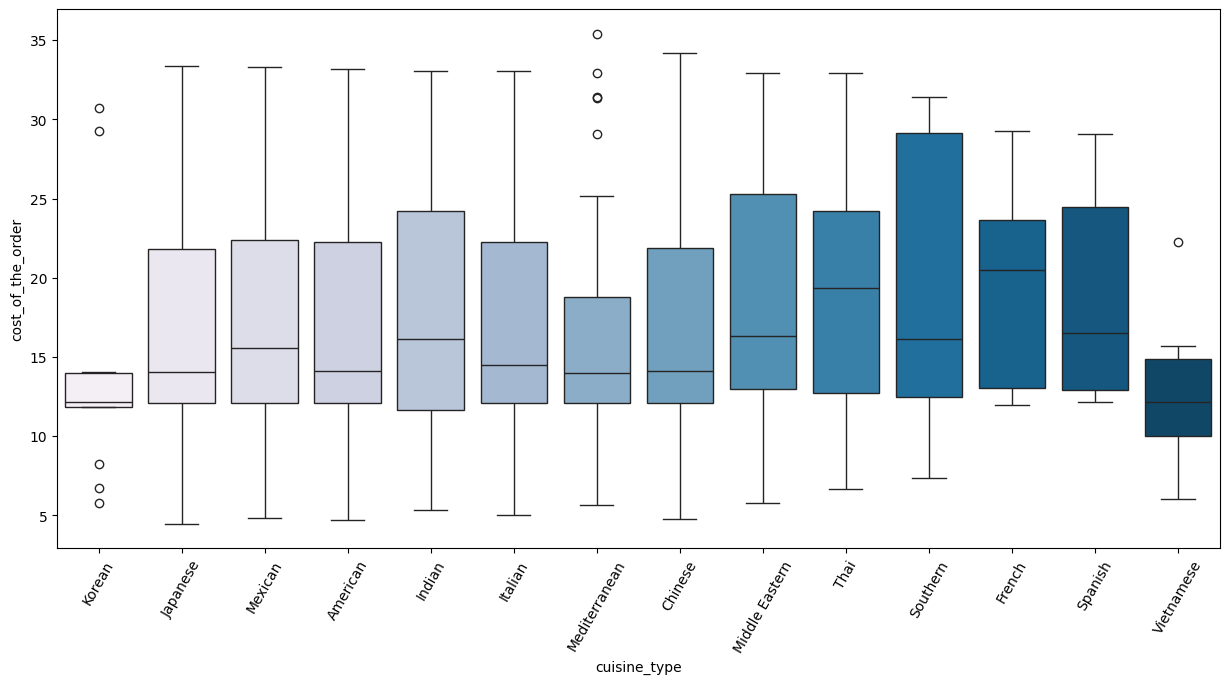

In [33]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

#### Cuisine vs Food Preparation time

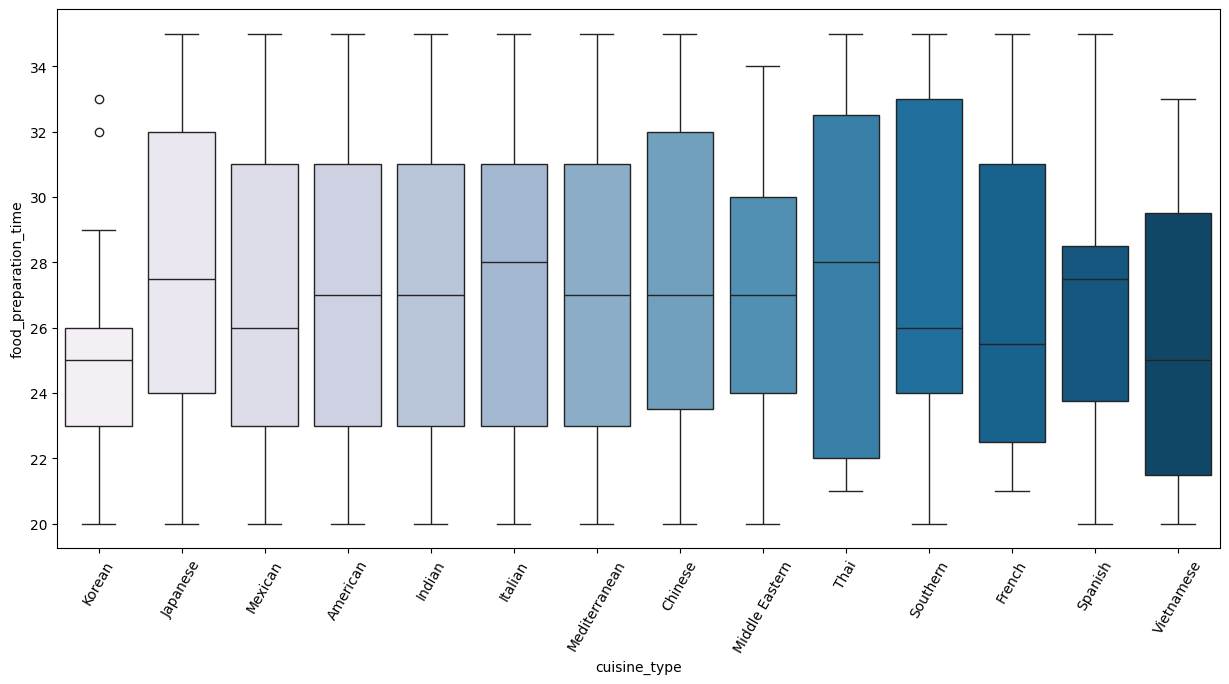

In [34]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

#### Day of the Week vs Delivery time

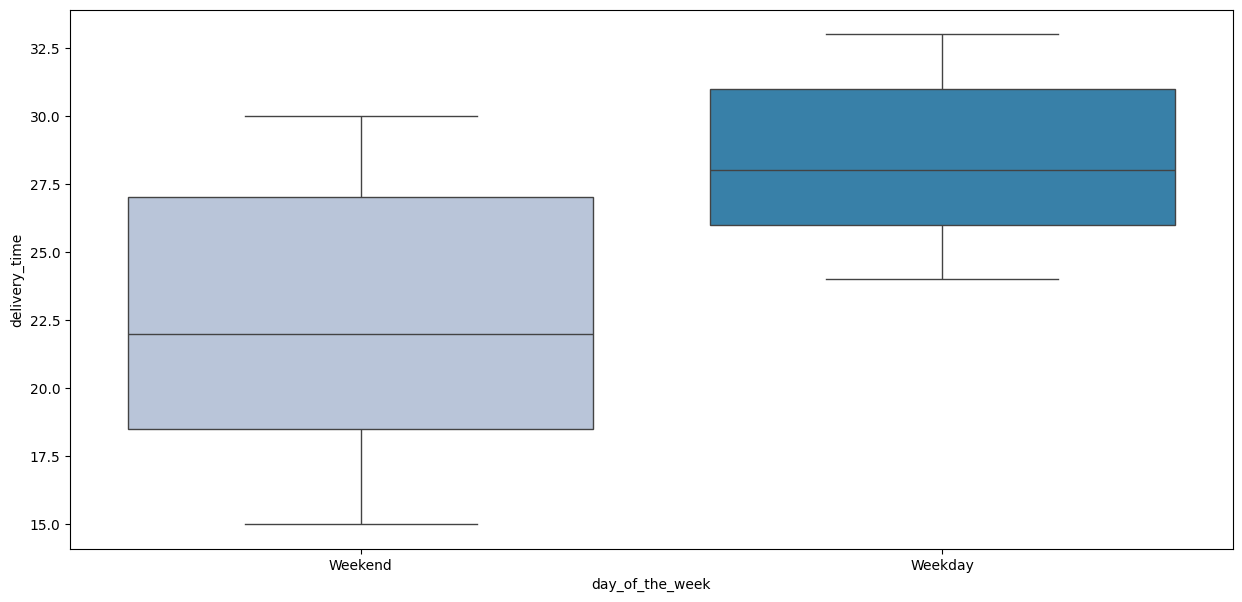

In [35]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu', hue = "day_of_the_week")
plt.show()

#### Run the below code and write your observations on the revenue generated by the restaurants.

In [36]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

It looks like Shake Shack had substaintially more revenue than any other restaurant in this data set. Blue Ribbon had two of the top four restaurants in terms of revenue. The revenue by restaurant has a wide distribution

#### Rating vs Delivery time

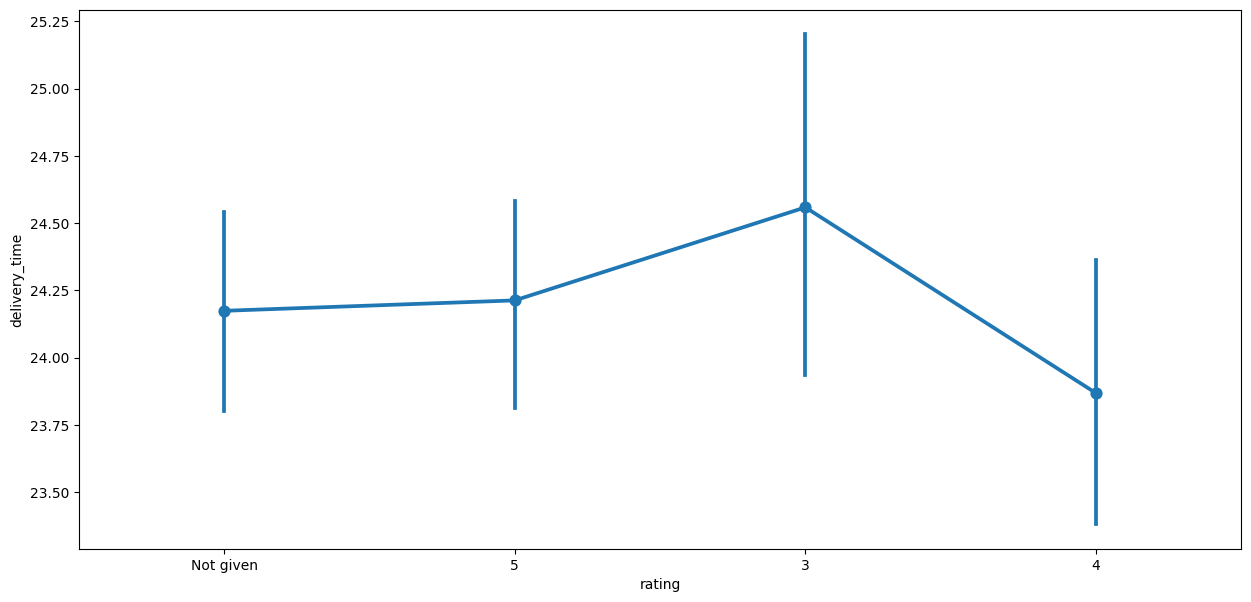

In [37]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Rating vs Food preparation time

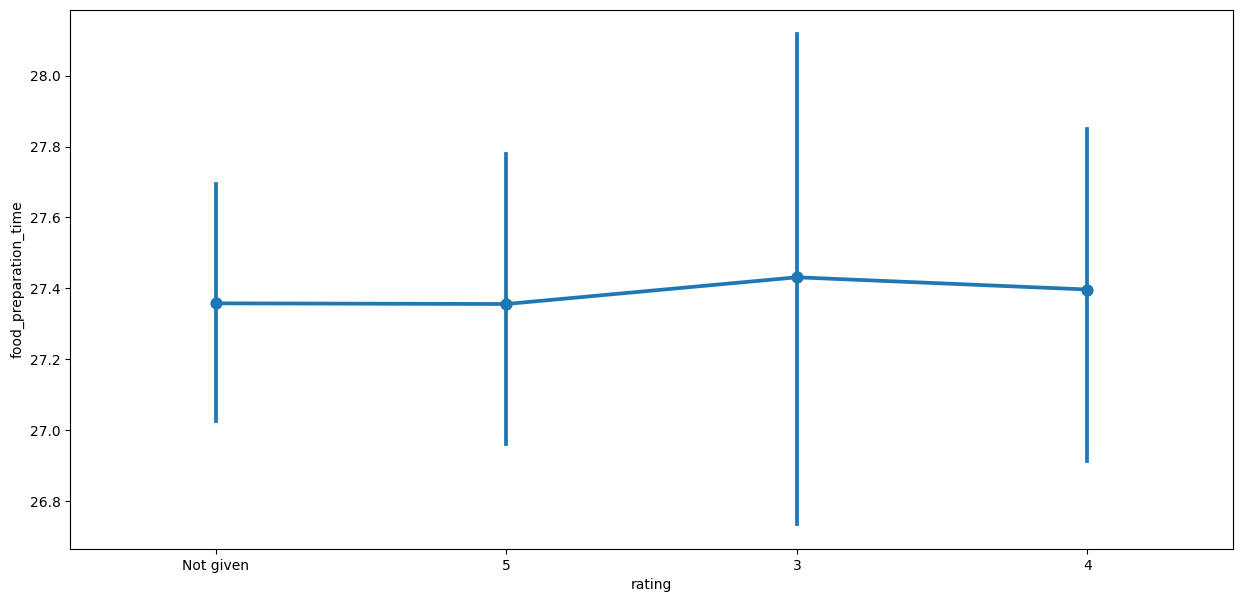

In [38]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

#### Rating vs Cost of the order

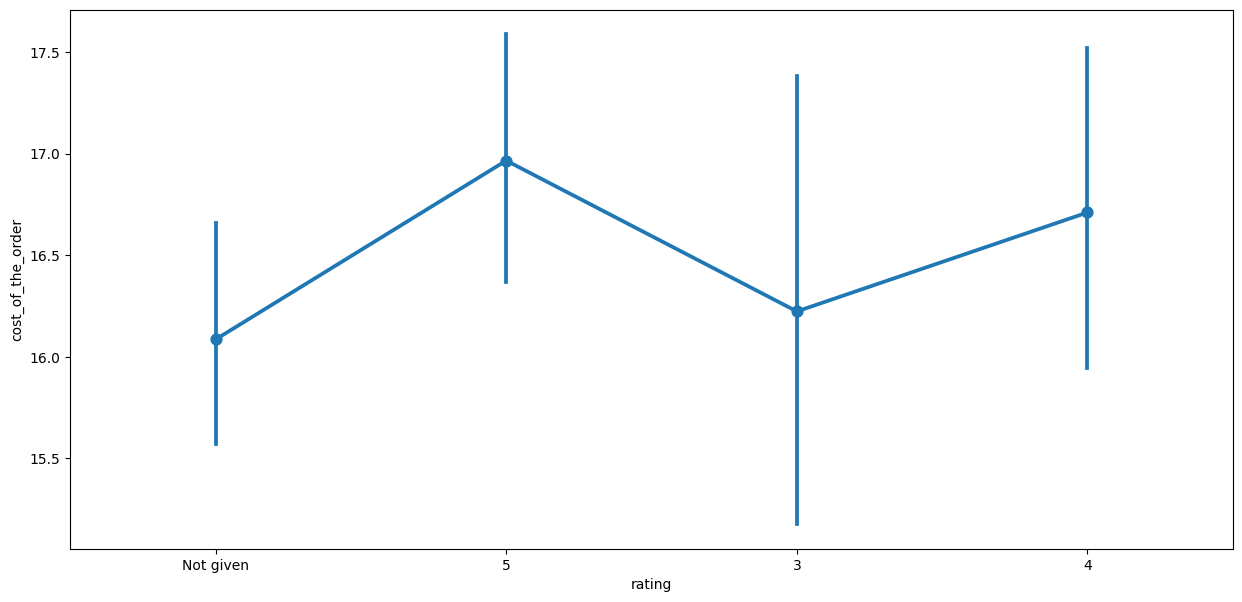

In [39]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

#### Correlation among variables

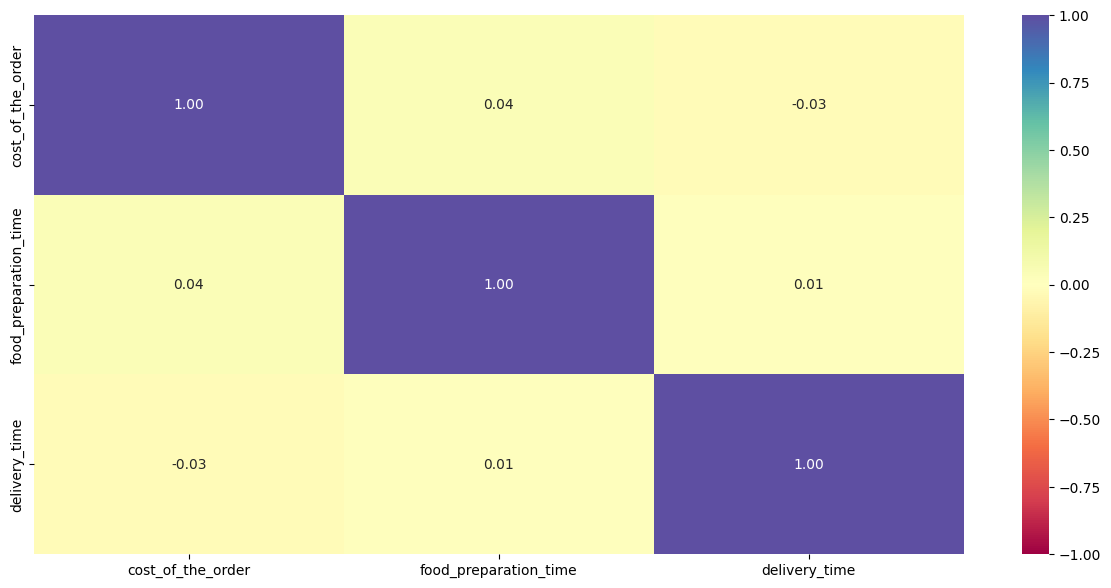

In [40]:
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [41]:
df_rated = df[df['rating'] != 'Not given'].copy()

df_rated['rating'] = df_rated['rating'].astype('int')

df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [42]:
# restaurant names that have rating count more than 50
rest_names = df_rating_count['restaurant_name'][df_rating_count['rating'] > 50]

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [43]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [44]:

total_rev = df['Revenue'].sum()
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)[2 marks]


In [45]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


# Get orders that cost above 20 dollars
df_greater_than_60 = df[df['total_time']>60]

print('The number of total orders that have more than 60 minutes total delivery time is:', df_greater_than_60.shape[0])

percentage = (df_greater_than_60.shape[0] / df.shape[0]) * 100

print("Percentage of orders that have more than 60 minutes total delivery time is:", round(percentage, 2), '%')




The number of total orders that have more than 60 minutes total delivery time is: 200
Percentage of orders that have more than 60 minutes total delivery time is: 10.54 %


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [46]:
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')





The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Please observe presentation file

### Recommendations:

*  Please observe presentation file

---